# Conditioning and Stability

Alberto Quaini

## Import libraries

In [107]:
import numpy as np
import math
import pandas as pd
import scipy.linalg as la
import sympy as sy
from matplotlib import pyplot as plt

## Problem 1

In [24]:
def cond_num(A):
    evals = la.svdvals(A)
    if np.allclose(evals.min(), 0):
        return np.inf
    else:
        return evals.max() / evals.min()

In [7]:
A = np.array([[2, 1], [2.2, 4]])
np.allclose(cond_num(A), np.linalg.cond(A))

True

In [11]:
Q, R = la.qr(A)
np.allclose(cond_num(Q), 1) 

True

In [27]:
S = np.array([[1,1],[2,2]])
cond_num(S)

inf

## Problem 2

In [48]:
def cond_experiment():
    # The roots of w are 1, 2, ..., 20.
    w_roots = np.arange(1, 21)

    # Get the exact Wilkinson polynomial coefficients using SymPy.
    x, i = sy.symbols('x i')
    w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
    w_coeffs = np.array(w.all_coeffs())

    plt.scatter(w_roots.real, w_roots.imag,
            c = 'b', marker = 'o', s = 20, label = "Original")
    label = ''
    acns = np.zeros(100)
    rcns = np.zeros(100)

    for i in range(100):
        r = np.random.normal(1, 1e-10, 21)
        new_coeffs = w_coeffs * r
        new_roots = np.roots(np.poly1d(new_coeffs))
    
        if i == 99:
            label = 'Perturbed'
    
        plt.scatter(new_roots.real, new_roots.imag,
                    c = 'k', marker = '.', s = 0.2, label = label)
    
    
        acns[i] = la.norm(new_roots - w_roots, np.inf) / la.norm(new_coeffs - w_coeffs, np.inf)
        rcns[i] = acns[i] * la.norm(w_coeffs, np.inf) / la.norm(w_roots, np.inf)
        
    plt.xlabel("Real Axis")
    plt.ylabel("Imaginary Axis")
    plt.legend(loc = 'upper left')
    plt.show()

    acn = acns.max()
    rcn = rcns.max()
    avg_acn = acns.mean()
    avg_rcn = rcns.mean()
    print("Approximate Absolute CN:\t\t", acn)
    print("Approximate Average Absolute CN:\t", avg_acn)
    print("Approximate Relative CN:\t\t", rcn)  
    print("Approximate Average Relative CN:\t", avg_rcn)
    
    return avg_acn, avg_rcn

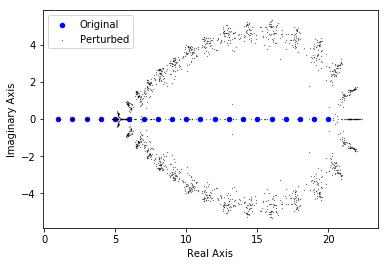

Approximate Absolute CN:		 4.297459738795945e-08
Approximate Average Absolute CN:	 1.4785076261049025e-08
Approximate Relative CN:		 29660550892.64138
Approximate Average Relative CN:	 10204482032.338856


In [50]:
a, b = cond_experiment()

## Problem 3

In [60]:
def eigen_cond(A):
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j * imags
    evals = la.eigvals(A)
    evals_h = la.eigvals(A + H)
    abs_cn = la.norm(evals - evals_h, 2) / la.norm(H, 2)
    rel_cn = abs_cn * la.norm(A, 2) / la.norm(evals, 2)
    
    return abs_cn, rel_cn

## Problem 4

In [65]:
def cond_picture(bounds, res):
    
    x_min, x_max, y_min, y_max = bounds
    xs = np.linspace(x_min, x_max, res)
    ys = np.linspace(y_min, y_max, res)
    cond_nums = np.zeros((res, res))
    for i in range(res):
        for j in range(res):
            A = np.array([[1, xs[i]], [ys[j], 1]])
            cond_nums[i,j] = eigen_cond(A)[1]
    plt.pcolormesh(xs, ys, cond_nums, cmap='gray_r')
    plt.colorbar()
    plt.title('Condition number')
    plt.xlabel('x')
    plt.ylabel('y')


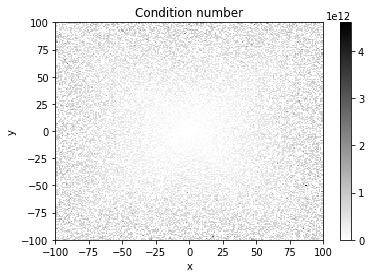

In [66]:
cond_picture([-100,100,-100,100],200)

## Problem 5

In [94]:
def cond_poly(n):
    xk, yk = np.load('stability_data.npy').T
    A = np.vander(xk, n + 1)
    
    ck_inv = la.inv(A.T @ A) @ A.T @ yk
    err_Inv = np.linalg.norm(A @ ck_inv - yk)
    
    Q , R = la.qr(A, mode='economic')
    ck_QR = la.solve_triangular(R, Q.T @ yk)
    err_QR = np.linalg.norm(A @ ck_QR - yk)
    
    plt.plot(xk, yk, ".k")
    plt.plot(xk, np.polyval(ck_inv, xk), label="Normal Equations")
    plt.plot(xk, np.polyval(ck_QR, xk), label = "QR Solver")
    plt.legend(loc = 'upper left')
    plt.title("Fit of Data for Polynomial of Degree " + str(n))


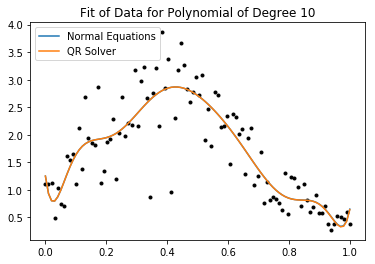

In [106]:
cond_poly(10)

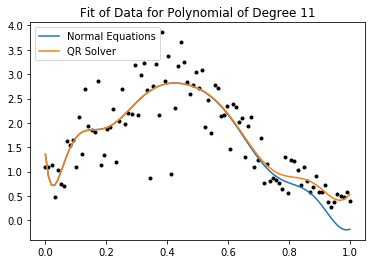

In [105]:
cond_poly(11)

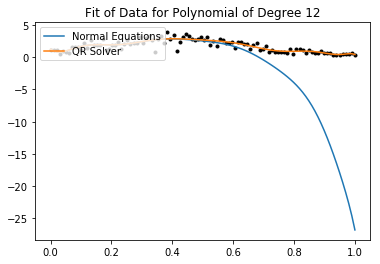

In [96]:
cond_poly(12)

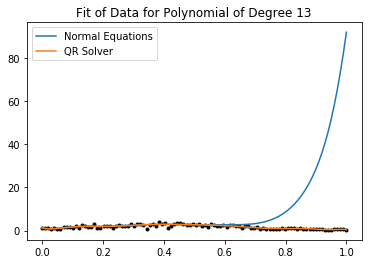

In [104]:
cond_poly(13)

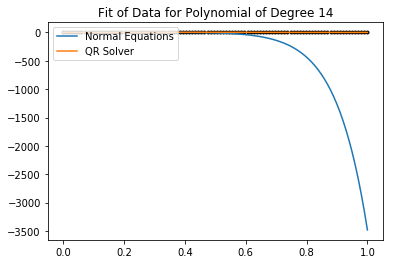

In [97]:
cond_poly(14)

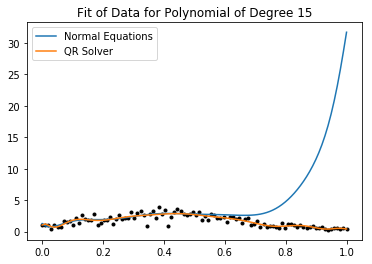

In [98]:
cond_poly(15)

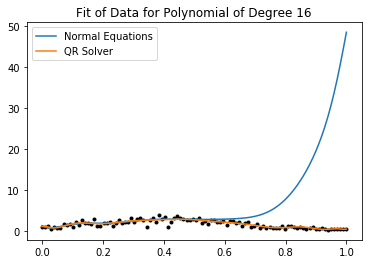

In [99]:
cond_poly(16)

## Problem 6

In [147]:
def catastrophic_integral():
    
    ngrid = np.arange(5,55,5)
    err = []
    x = sy.Symbol('x')
    
    for n in ngrid:
        sym_integral = float(
            sy.integrate(x**n * sy.exp(x - 1), (x, 0, 1))
        )
        num_integral = float(
            (-1)**n * sy.subfactorial(n) + (-1)**(n + 1) * sy.factorial(n) / math.e
        )
        err.append(abs(num_integral - sym_integral) / abs(sym_integral))
    
    plt.plot(ngrid, err)
    plt.title('Integral Relative Forward Error')
    plt.xlabel('n')
    plt.ylabel('err')
    plt.yscale('log')

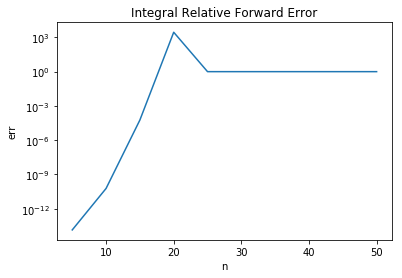

In [148]:
catastrophic_integral()